In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
from nltk.stem.porter import *

## **Data Preprocessing**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
train = pd.read_csv("/content/train_E6oV3lV.csv")
train['flag'] = 1
t1 = train.iloc[:,2:]

In [ ]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
t1.head()

,tweet,flag
0,@user when a father is dysfunctional and is s...,1
1,@user @user thanks for #lyft credit i can't us...,1
2,bihday your majesty,1
3,#model i love u take with u all the time in ...,1
4,factsguide: society now #motivation,1


In [ ]:
finalTest = pd.read_csv("/content/test_tweets_anuFYb8.csv")
finalTest['flag'] = 0
t2 = finalTest.iloc[:,1:]
t2.head()

,tweet,flag
0,#studiolife #aislife #requires #passion #dedic...,0
1,@user #white #supremacists want everyone to s...,0
2,safe ways to heal your #acne!! #altwaystohe...,0
3,is the hp and the cursed child book up for res...,0
4,"3rd #bihday to my amazing, hilarious #nephew...",0


In [ ]:
appended = t1.append(t2, ignore_index=True)
appended.tail()

,tweet,flag
49154,thought factory: left-right polarisation! #tru...,0
49155,feeling like a mermaid ð #hairflip #neverre...,0
49156,#hillary #campaigned today in #ohio((omg)) &am...,0
49157,"happy, at work conference: right mindset leads...",0
49158,"my song ""so glad"" free download! #shoegaze ...",0


In [ ]:
def stringReplace(inputText, pattern = '@[\w]*'):
    handles = re.findall(pattern, inputText)
    for handle in handles:
        inputText = re.sub(handle, '', inputText)
    return inputText

In [ ]:
appended['tweet_cleaned_1'] = appended['tweet'].apply(lambda x: stringReplace(x))

In [ ]:
appended.head()

,tweet,flag,tweet_cleaned_1
0,@user when a father is dysfunctional and is s...,1,when a father is dysfunctional and is so sel...
1,@user @user thanks for #lyft credit i can't us...,1,thanks for #lyft credit i can't use cause th...
2,bihday your majesty,1,bihday your majesty
3,#model i love u take with u all the time in ...,1,#model i love u take with u all the time in ...
4,factsguide: society now #motivation,1,factsguide: society now #motivation


In [ ]:
appended['tweet_cleaned_2'] = appended['tweet_cleaned_1'].str.replace("[^a-zA-Z]", " ")

In [ ]:
appended.head(10)

,tweet,flag,tweet_cleaned_1,tweet_cleaned_2
0,@user when a father is dysfunctional and is s...,1,when a father is dysfunctional and is so sel...,when a father is dysfunctional and is so sel...
1,@user @user thanks for #lyft credit i can't us...,1,thanks for #lyft credit i can't use cause th...,thanks for lyft credit i can t use cause th...
2,bihday your majesty,1,bihday your majesty,bihday your majesty
3,#model i love u take with u all the time in ...,1,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,factsguide: society now #motivation,1,factsguide: society now #motivation,factsguide society now motivation
5,[2/2] huge fan fare and big talking before the...,1,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,@user camping tomorrow @user @user @user @use...,1,camping tomorrow dannyâ¦,camping tomorrow danny
7,the next school year is the year for exams.ð...,1,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,we won!!! love the land!!! #allin #cavs #champ...,1,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...
9,@user @user welcome here ! i'm it's so #gr...,1,welcome here ! i'm it's so #gr8 !,welcome here i m it s so gr


In [ ]:
appended['tweet_cleaned_3'] = appended['tweet_cleaned_2'].apply(lambda x: ' '.join([w for w in x.split() if len(w)> 3]))

In [ ]:
appended.tail()

,tweet,flag,tweet_cleaned_1,tweet_cleaned_2,tweet_cleaned_3
49154,thought factory: left-right polarisation! #tru...,0,thought factory: left-right polarisation! #tru...,thought factory left right polarisation tru...,thought factory left right polarisation trump ...
49155,feeling like a mermaid ð #hairflip #neverre...,0,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid hairflip neverre...,feeling like mermaid hairflip neverready forma...
49156,#hillary #campaigned today in #ohio((omg)) &am...,0,#hillary #campaigned today in #ohio((omg)) &am...,hillary campaigned today in ohio omg am...,hillary campaigned today ohio used words like ...
49157,"happy, at work conference: right mindset leads...",0,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads...,happy work conference right mindset leads cult...
49158,"my song ""so glad"" free download! #shoegaze ...",0,"my song ""so glad"" free download! #shoegaze ...",my song so glad free download shoegaze ...,song glad free download shoegaze newmusic newsong


In [ ]:
#Tokenization

tokenziedTweet = appended['tweet_cleaned_3'].apply(lambda x: x.split())
tokenziedTweet.tail()

49154    [thought, factory, left, right, polarisation, ...
49155    [feeling, like, mermaid, hairflip, neverready,...
49156    [hillary, campaigned, today, ohio, used, words...
49157    [happy, work, conference, right, mindset, lead...
49158    [song, glad, free, download, shoegaze, newmusi...
Name: tweet_cleaned_3, dtype: object

In [ ]:
#Stemming

stemmer = PorterStemmer()

stemmedTweet = tokenziedTweet.apply(lambda x: [stemmer.stem(i) for i in x])

stemmedTweet.tail()

49154    [thought, factori, left, right, polaris, trump...
49155    [feel, like, mermaid, hairflip, neverreadi, fo...
49156    [hillari, campaign, today, ohio, use, word, li...
49157    [happi, work, confer, right, mindset, lead, cu...
49158    [song, glad, free, download, shoegaz, newmus, ...
Name: tweet_cleaned_3, dtype: object

In [ ]:
for i in range(len(stemmedTweet)):
  stemmedTweet[i] = " ".join(stemmedTweet[i])

In [ ]:
appended['final_tweet'] = stemmedTweet

In [ ]:
appended.head()

,tweet,flag,tweet_cleaned_1,tweet_cleaned_2,tweet_cleaned_3
0,@user when a father is dysfunctional and is s...,1,when a father is dysfunctional and is so sel...,when a father is dysfunctional and is so sel...,when father dysfunctional selfish drags kids i...
1,@user @user thanks for #lyft credit i can't us...,1,thanks for #lyft credit i can't use cause th...,thanks for lyft credit i can t use cause th...,thanks lyft credit cause they offer wheelchair...
2,bihday your majesty,1,bihday your majesty,bihday your majesty,bihday your majesty
3,#model i love u take with u all the time in ...,1,#model i love u take with u all the time in ...,model i love u take with u all the time in ...,model love take with time
4,factsguide: society now #motivation,1,factsguide: society now #motivation,factsguide society now motivation,factsguide society motivation


### **Wordclcoud**

In [ ]:
#WordCloud
from wordcloud import WordCloud

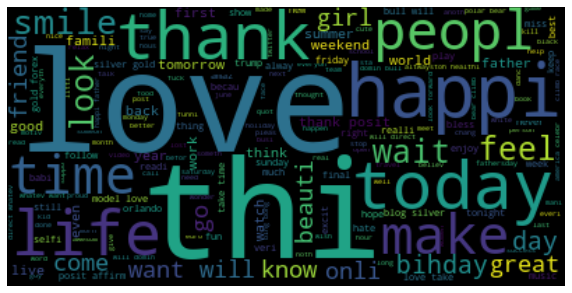

In [ ]:
all_words = " ".join([w for w in train['final_tweet']])

wordCloud = WordCloud(random_state=3, max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

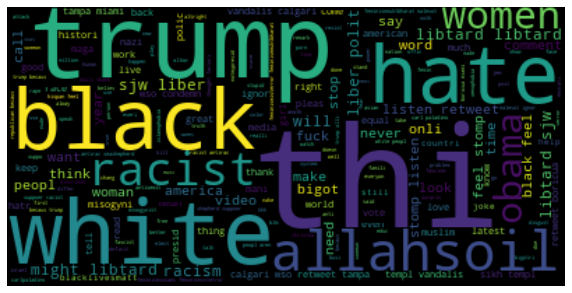

In [ ]:
all_words = " ".join([w for w in train[train['label'] ==1]['final_tweet']])

wordCloud = WordCloud(random_state=3, max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

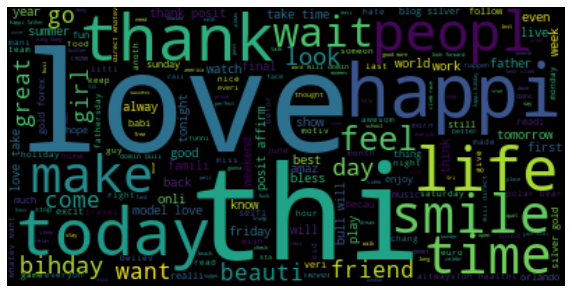

In [ ]:
all_words = " ".join([w for w in train[train['label'] ==0]['final_tweet']])

wordCloud = WordCloud(random_state=3, max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Deep Learning Model

In [ ]:
import numpy as np
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM, SpatialDropout1D
from keras.optimizers import Adam, RMSprop
from keras.metrics import Recall

In [ ]:
trainProcessed = appended[appended['flag'] == 1]
testProcessed = appended[appended['flag'] == 0]

In [ ]:
X = trainProcessed['tweet_cleaned_3']
y = train['label']
test = testProcessed['tweet_cleaned_3']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
print(class_weights)

[0.53754783 7.15817469]


In [ ]:
weight_modified = {0: 1,
                1: 10}

In [ ]:
tokenizer = Tokenizer(num_words= 47000)
tokenizer.fit_on_texts(appended['tweet_cleaned_3'])

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
test = tokenizer.texts_to_sequences(test)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 50

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
test = pad_sequences(test, padding='post', maxlen=maxlen)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 300, input_length=50))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64,dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
model.add(GlobalMaxPooling1D())
# model.add(LSTM(64,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model.add(Dense(32,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(8,activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 300)           13840200  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 300)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50, 64)            93440     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 2

In [ ]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[Recall()])

In [ ]:
# history = model.fit(X_train, y_train, batch_size= 128, epochs=5, validation_split=0.1, class_weight=weight_modified)
history = model.fit(X_train, y_train, batch_size= 64, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
450/450 [==============================] - 188s 417ms/step - loss: 0.2121 - recall: 0.2632 - val_loss: 0.1331 - val_recall: 0.6761
Epoch 2/5
450/450 [==============================] - 188s 418ms/step - loss: 0.0892 - recall: 0.7491 - val_loss: 0.1085 - val_recall: 0.6667
Epoch 3/5
450/450 [==============================] - 188s 418ms/step - loss: 0.0427 - recall: 0.8995 - val_loss: 0.1231 - val_recall: 0.6150
Epoch 4/5
450/450 [==============================] - 187s 415ms/step - loss: 0.0226 - recall: 0.9507 - val_loss: 0.1496 - val_recall: 0.6901
Epoch 5/5
450/450 [==============================] - 187s 416ms/step - loss: 0.0131 - recall: 0.9759 - val_loss: 0.1889 - val_recall: 0.7042


In [ ]:
model.evaluate(X_test, y_test)

100/100 [==============================] - 2s 25ms/step - loss: 0.1889 - recall: 0.7042


[0.18889525532722473, 0.7042253613471985]

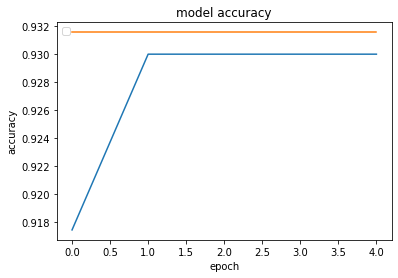

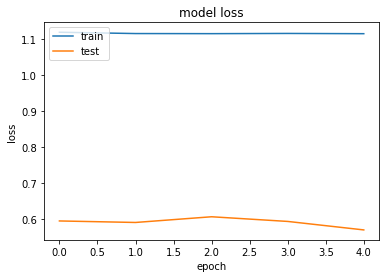

In [ ]:
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# predictedLabel = model.predict_classes(test)
predictedValue = model.predict(test)

In [ ]:
# finalTest['label'] = predictedLabel
finalTest['predicted_prob'] = predictedValue
finalTest['label'] = np.where(finalTest['predicted_prob'] >=0.5, 1,0)

In [ ]:
finalTest.head()

,id,tweet,flag,predicted_prob,label
0,31963,#studiolife #aislife #requires #passion #dedic...,0,0.001212,0
1,31964,@user #white #supremacists want everyone to s...,0,0.996705,1
2,31965,safe ways to heal your #acne!! #altwaystohe...,0,0.000940,0
3,31966,is the hp and the cursed child book up for res...,0,0.001085,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0,0.000925,0


In [ ]:
finalTest['label'] .value_counts()

0    15818
1     1379
Name: label, dtype: int64

In [ ]:
finalTest.to_csv('/content/predicted.csv')

### **Optimum Probability**

In [ ]:
pred = model.predict_proba(X_train)
pred.shape

Instructions for updating:
Please use `model.predict()` instead.


(25569, 1)

In [ ]:
def optimum_probability(fitted_model, x_train, y_train):
    
    """
    Function returns a dataframe with important values such as accuracy, precision, TPR etc.
    It will be helpful in finding the optimum probability to draw decision boundries.
    
    Parameters:
        fitted_model = requires a fitted model e.g. LogisticRegression().fit(X data, y data)
        x_test & y_test = requires the complete test data 
    """
    
    pred = fitted_model.predict(x_train)
    test_class = pd.DataFrame(y_train, columns = ["label"])
    predicted_probability = pd.DataFrame(pred, columns = ["prob"])
    test_predict_probability = pd.concat([test_class, predicted_probability], axis = 1)
    
    probability = np.arange(0,1.01,0.01)

    value_list = []
    for prob in probability:
        test_predict_probability['new_predicted'] = np.where(test_predict_probability["prob"] >= prob, 1, 0)
        tp = np.where(np.logical_and(test_predict_probability["label"] == 1, test_predict_probability['new_predicted'] == 1), 1, 0).sum()
        tn = np.where(np.logical_and(test_predict_probability["label"] == 0, test_predict_probability['new_predicted'] == 0), 1, 0).sum()
        fp = np.where(np.logical_and(test_predict_probability["label"] == 0, test_predict_probability['new_predicted'] == 1), 1, 0).sum()
        fn = np.where(np.logical_and(test_predict_probability["label"] == 1, test_predict_probability['new_predicted'] == 0), 1, 0).sum()
        
        accuracy = (tp+tn)/(tp+tn+fp+fn)
        precision = tp/(tp+fp)
        tpr = tp/(tp+fn)
        tnr = tn/(tn+fp)
        fpr = fp/(fp+tn)
        fnr = fn/(fn+tp)
        value_list.append([prob, accuracy, precision, tpr, fpr, tnr, fnr])
        
    logistic_dataframe = pd.DataFrame(value_list, 
                                      columns = ["probability","accuracy", 
                                                 "precision", "tpr", "fpr", 
                                                 "tnr", "fnr"])
    
    return logistic_dataframe
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in long_scalars


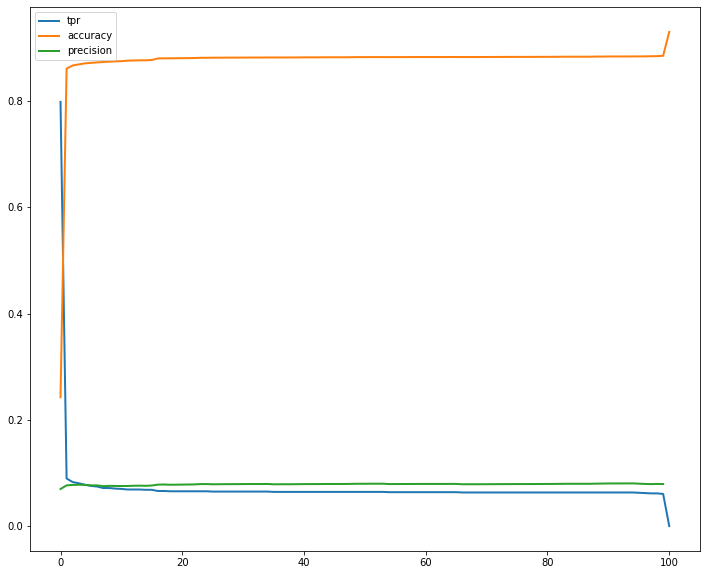

In [ ]:
#Usage
    
probData = optimum_probability(model,X_train, y_train)

probData.plot.line(y=["tpr", "accuracy", 'precision'], figsize=(12,10),lw=2)

In [ ]:
print(probData)

     probability  accuracy  precision       tpr       fpr       tnr       fnr
0           0.00  0.242520   0.069786  0.798432  0.799226  0.200774  0.201568
1           0.01  0.831124   0.075453  0.125980  0.115923  0.884077  0.874020
2           0.02  0.848097   0.076675  0.106383  0.096203  0.903797  0.893617
3           0.03  0.856310   0.076302  0.095185  0.086532  0.913468  0.904815
4           0.04  0.867418   0.080105  0.085666  0.073876  0.926124  0.914334
..           ...       ...        ...       ...       ...       ...       ...
96          0.96  0.918339   0.106771  0.022956  0.014422  0.985578  0.977044
97          0.97  0.921507   0.098182  0.015118  0.010428  0.989572  0.984882
98          0.98  0.924244   0.112821  0.012318  0.007274  0.992726  0.987682
99          0.99  0.927099   0.093750  0.005039  0.003658  0.996342  0.994961
100         1.00  0.930150        NaN  0.000000  0.000000  1.000000  1.000000

[101 rows x 7 columns]


In [ ]:
probData.to_csv('/content/probData.csv', index=False)